# 习题讲解

In [1]:
import numpy as np
import sympy as sym
from matplotlib import pyplot as plt
from scipy.special import comb, perm
from scipy import stats

现在来想像一个统计学家，他还没有发现概率论。现在他来数数。他有一个硬币，能产生0（正面）和1（反面）两个随机数。

In [2]:
X = np.random.randint(0, 2)
print(X)

1


他愉快地玩耍了一会儿，开始怀疑自己的硬币有问题，是不是一面比另一面更重？于是他开始抛很多次，然后把每一次的结果都记下来。然后数一数正面的次数和反面次数。

In [3]:
n = 10000
S = np.zeros(2, dtype=np.int)
X = np.zeros(n, dtype=np.int)
for i in range(n):
    X[i] = np.random.randint(0, 2)
    S[X[i]] += 1
print(S)

[4993 5007]


他发现正面和反面的数字总是很接近，尽管随着$n$变大，会越来越接近，但是几乎不会完全相等，一会儿这个大，一会儿那个大。似乎还是不是很明确这个硬币有没有问题。于是他决定，每抛10次为一组，连抛10000组，记录下每组的正面数，看看这个硬币在多次试验中，是更容易偏正面还是偏负面？

In [4]:
N = 10000
n = 10
S = np.zeros((N, 2), dtype=np.int)
X = np.zeros(n, dtype=np.int)
for j in range(N):
    for i in range(n):
        X[i] = np.random.randint(0, 2)
        S[j][X[i]] += 1
print(S)

[[3 7]
 [6 4]
 [7 3]
 ...
 [2 8]
 [5 5]
 [4 6]]


这时他发现其实只要数正面就可以了，因为反面就是余下的。所以他数一下每组正面次数从0一直到$n = 10$各有几次，一共做了10000组，那么正面几次出现最多？打印出来已经太乱了，所以他决定画在纸上。

<BarContainer object of 11 artists>

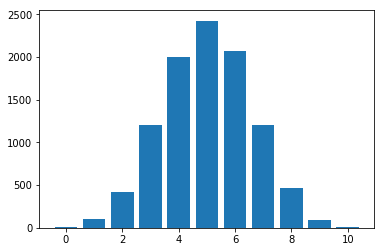

In [5]:
f = np.zeros(n + 1, dtype=np.int)
for i in range(N):
    f[S[i,0]] += 1
plt.bar(range(n + 1),f)    

似乎很完美！5次最多，其次是4和6。但这个统计学家是个怀疑论者。他想，如果这个硬币正面更轻（因此更容易抛出正面），那么这件事情按照刚才的数数方式，能否被发现？于是他去找了一个工匠（一个退休的数学家），向他要了一枚更容易抛出正面的硬币，而且工匠告诉他，如果他能抛**无穷多次**，那么正面的次数，会正好是总次数$n$的百分之六十！（这个工匠更像上帝退休了...）

In [6]:
def magic_coin():
    Z = np.random.rand()
    X = 1
    if (Z < 0.6):
        X = 0
    return X

In [7]:
magic_coin()

0

首先这个统计学家当然会测试一下这枚硬币是否真的有这么神奇，于是他重新抛了$n$次，来数一数正面和负面的次数：

In [8]:
def count_coin(n):
    S = 0
    X = np.zeros(n, dtype=np.int)
    for i in range(n):
        X[i] = magic_coin()
        S += X[i]
    return n - S

In [9]:
count_coin(10000)

6032

他现在更加怀疑那个工匠是上帝了...居然差不多正好...现在他再次重复之前的分组实验：

<BarContainer object of 11 artists>

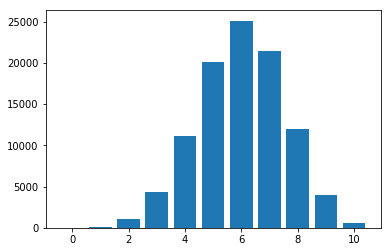

In [10]:
N = 100000
n = 10
S = np.zeros(N, dtype=np.int)
X = np.zeros(n, dtype=np.int)
for j in range(N):
    for i in range(n):
        X[i] = magic_coin()
        S[j] += (1 - X[i])
        
f = np.zeros(n + 1, dtype=np.int)
for i in range(N):
    f[S[i]] += 1
plt.bar(range(n + 1),f)    

现在最大可能性偏移到6了，也就是说每抛10次硬币，最有可能有6次正面。这和工匠告诉他的是一致。但也有可能是其他。比如：

In [11]:
f

array([   11,   149,  1084,  4346, 11117, 20117, 25115, 21496, 12017,
        3965,   583])

f[i]就表示了在10万组实验中，出现0~10次正面的次数。这一组数据似乎也是有规律的。他去问那个工匠，那个工匠告诉他，抛一次，有$0.6$的可能性出现正面，那么两次就是$0.6^2$的可能性，抛$i$次，就是$0.6^i$可能性，一共抛了$n$次，其中$i$次出现正面，其他$n - i$次出现负面，那么可能性就是$0.6^i(1 - 0.6)^{n-i}$，但是我们不知道正面和负面出来的次序，如果我们之关心出现正面的次数而不关心次序，那么也就是说抛$n$次，只要$i$次是正面就行，那么全部的可能组合有$\binom{n}{i}$种情况。于是抛$n$次硬币出现$i$次正面的可能性是：
$$
\binom{n}{i}0.6^i(1 - 0.6)^{n-i}
$$
这个可能性乘以实验总次数$N$，就是出现$i$次正面的最可能的次数，和$f$很接近。不信可以画一下：

<BarContainer object of 11 artists>

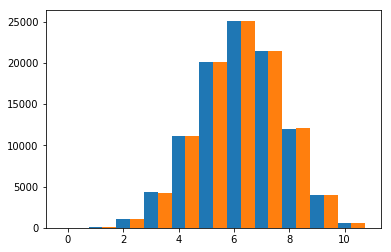

In [12]:
x = list(range(n + 1))
plt.bar(range(n + 1),f,width=0.5)  
p = np.zeros(n + 1)
for i in range(n + 1):
    p[i] = 100000*comb(n,i)*0.6**i*(1 - 0.6)**(n - i)
    x[i] = x[i] + 0.5
plt.bar(x, p, width=0.5)

几乎一摸一样。而且工匠没有做任何实验，完全是通过推理。同时他还指出，对如果一个硬币抛出正面的可能性为$p$，那么在$n$次实验中，正面次数是$i$次的可能性是：
$$
p_i = \binom{n}{i}p^i(1 - p)^{n-i}
$$
他还告诉统计学家其实他不是上帝，他生前叫Bernoulli。现在统计和概率取得了一致（数数和推理）。接下去大家可以一起愉快地讨论，比如统计学家也接受了可能性就是概率的称呼，他指出如果一次实验出现正面的概率是$p$，那么$n$次实验出现正面的总次数就是$np$；而工匠说既然出现$i$次正面的概率是$p_i$，那么$n$次实验从概率推导来说，全部正面的总次数就是
$$
\frac{\sum_{i=0}^n i\cdot p_i \cdot n}{n} = \sum_{i=0}^n i\cdot \binom{n}{i}p^i(1 - p)^{n-i},
$$
注意这个在逻辑上两条不一样的路，于是两人一起愉快地发现了一个恒等式
$$
\sum_{i=0}^n i\cdot \binom{n}{i}p^i(1 - p)^{n-i} = np.
$$
而$np$这个量，可以看成是当$n$趋于无穷时的正面次数的概率加权平均数，我们给他一个名字：**期望**。记$n$次实验的总正面次数是$S$，那么我们就说$E[S] = np$。于是现在即便不知道$p$，我们可以通过多次实验，来概率逼近$p$值。也就是正面的总次数$S \approx np$，因为这两者的期望是相同的，这样的估计随着$n$增大，会越来越接近。期望相同的估计，称为无偏估计。进而有$p \approx S/n$。也就是说，$S/n$现在可以看成是$p$的无偏估计，当$p$未知时，比如现在对单位正方形投点，而$p$表示投入某个区域$R$的概率。这样我们就可以通过$S/n$来估算$p$。工匠补充了一下，期望是线性的，也就是说，两个随机变量和的期望，等于它们期望的和；一个随机变量乘以一个常数的期望，等于它的期望乘以常数。这一点从概率加权平均的意义上很容易直观理解。所以我们可以放心求一个圆的面积。

In [13]:
def area_circle(times):
    inside = 0
    dots = np.random.rand(2, times)
    for i in range(times):
        x = dots[0, i] - 0.5
        y = dots[1, i] - 0.5
        if x * x + y * y < 0.25:
            inside += 1
    return inside / times
area_circle(10000)

0.7888

于是统计学家很开心地表示，数数也可以求面积，本质上没区别。不过这样数显然是有误差的，问题是这个误差是否有一个范围？或者如何理解一个随机变量的范围？否则我们并不知道该如何面对这样数数数出来的结果。为此，我们先来体会一下随机变量的震荡。还是那个$p = 0.6$的硬币，我们抛$10000$组，每组$100$次，然后记录下每组的正面数。

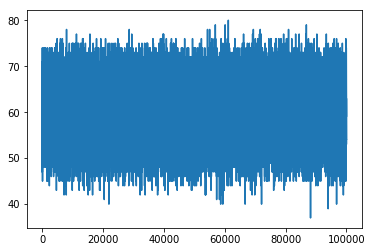

In [14]:
N = 100000
n = 100
S = np.zeros(N)
for i in range(N):
    S[i] = count_coin(n)
plt.plot(S)

我们会注意到，正面总数$S$是在$E[S] = np$附近震荡，而且限制在一个范围内。我们先将其校正到$0$位。

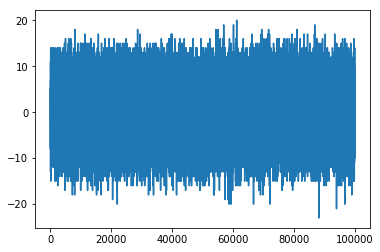

In [15]:
p = 0.6
D = np.zeros(N)
for i in range(N):
    D[i] = S[i] - n*p
plt.plot(D)

现在这个值$S - np = S - E[S]$在$0$附近的一个范围内震荡。我们先判定一下这个震荡的是否关于$0$对称？我们测一下它的均值，这个应该接近期望$E[S - E[S]]$，因为每一个偏差都是等概的。

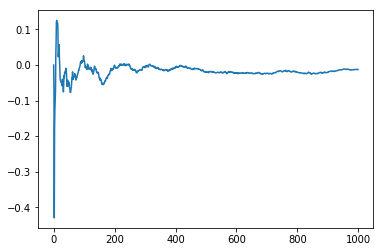

In [16]:
V = np.zeros(1000)
for i in range(1, 1000):
    V[i] = sum(D[1:i * 100]) / (i * 100)
plt.plot(V)

哦，这个期望趋于$0$。工匠说：我可以证明这一点。这次统计学家先让他坐下。因为这个均值是数出来的，光看图还能继续给我们很多信息。我们知道这个震荡是关于$0$对称的，是包含正负两个方面的。两方面的偏差都是偏差，而且这种偏差代表的是每一次**独立**实验的偏差，彼此不能相抵。且并不随$n$增加而减少。所以我们如果要用一个量来衡量这种偏差，我们最好用一个能将正负视为同样偏差的变换，比如绝对值或平方。这里我们用平方，来获取一些良好的性质。于是现在我们要评估的震荡，可以用$E[(S - E[S])^2]$来表示。我们称它为$S$的**方差**，记作$Var$或$V$。也就是
$$
Var[S] = E[(S - E[S])^2].
$$
方差有线性么？比如两个随机变量和的方差，是否等于两个方差的和？前提是如果它们是**独立**的。也就是两个随机变量之间没有相互影响，完全无关。比如统计学家抛两次硬币，就是互相独立的。那么他抛一次硬币的方差是多少？抛一次硬币，如果正面的概率是$p$，那么反面的概率是$1 - p$。如果正面的值用$1$，反面用$0$表示，则期望就是
$$
0 \cdot (1 - p) + 1 \cdot p = p,
$$
所以方差是
$$
(0 - p)^2 \cdot (1 - p) + (1 - p)^2 \cdot p = p^2(1 - p) + (1 - p)^p = p(1 - p).
$$
每一次抛都是独立的，所以抛了$n$次，方差就是$np(1 - p)$。这时工匠插嘴，和算期望时一样，也可以直接从$p_i$的分布得出方差，也就是说，有
$$
Var[S] = E[(S - E[S])^2] = \sum_{i = 0}^n (i - np)^2\cdot p_i = \sum_{i = 0}^n (i - np)^2 \cdot \binom{n}{i}p^i(1 - p)^{n-i} = np(p - 1).
$$
（这个证明可以留做作业^_^)而考虑到方差也是一种期望，由期望的线性，有
$$
Var[S] = E[(S - E[S])^2] = E[S^2 - 2SE[S] - (E[S])^2] = E[S^2] - (E[S])^2.
$$
而且这种对震荡的衡量还可以继续讨论下去。一般地，称$\mu_k$为随机变量$S$的$k$阶中心矩，如果
$$
\mu_k = E[(S - E[S])^k].
$$
特别地，$\mu_0 = 1$，$\mu_1 = 0$（这个就是我们之前讨论的没有平方之前的偏离），$\mu_2$是方差，之后的都各自有意义...（统计学家一板砖敲晕了工匠）

目前对方差是可以验证一下，目前对$n = 100000$的统计结果的方差如下：

In [17]:
V = sum(D**2)/N
print(V)

24.05056


”真实“的方差是：

In [18]:
n*p*(1-p)

24.0

这时工匠醒来说：“哦！你算的不对！你在算方差时用了$p$，这个作为统计是未知的！“确实，我们目前的公式在算$S - E[S]$时，$E[S] = np$是不允许在统计面积中使用的。在统计的时候，我们只允许用$S$和$n$。于是我们要重新估计我们的”可计算方差“，或者，我们构造一个**统计量**，使它的期望和$\mathrm{Var}[S]$一致。我们先来观察一下和$E[S - E[S]] = np(1-p)$最”接近“的（也即用频率$S/n$来代替$p$）：
$$
E\left[n \cdot \frac{S}{n}\left(1 - \frac{S}{n}\right)\right] = E[S(1 - \frac{S}{n})] = E[S]- \frac{1}{n} E[S^2],
$$
这里我们要用上面提到过的公式：
$$
Var[S]=E[S^2]-(E[S])^2.
$$
于是
$$
E\left[n \cdot \frac{S}{n}\left(1 - \frac{S}{n}\right)\right] = np - \frac{1}{n}(Var[S] + (E[S])^2)=np-\frac{1}{n}(np(1-p)+n^2p^2)=p(1-p)(n-1).
$$
它和我们的要求$Var[S] = np(1-p)$有点区别，把它矫正过去就是了：
$$
E\left[n \cdot \frac{S}{n}\left(1 - \frac{S}{n}\right)\cdot\frac{n}{n-1}\right]=E[S\left(1-\frac{S}{n}\right)\cdot\frac{n}{n-1}]=np(1-p).
$$
也就是说，$S(1-S/n)n/(n-1)$是$Var[S]$的一个无偏估计。但是注意到不论是$Var[S]$还是$S(1-S/n)n/(n-1)$，当$n \to \infty$时，都是发散的。而我们更多的场合是要估计$p$，也即面积时，我们用$S/n$来估计$p$，则$Var[S/n]$也可以用$(S/n)(1 - S/n)/(n - 1)$估计，这个量是关于$n$趋于零的，它表示随着$n$增加，这种围绕期望的震荡幅度会越来越小，也就意味者结果越来越可行。我们来实测一下，首先是$S/N$向$p$收敛的趋势，这个就是依概率1收敛的直观景象。表示：
$$
\lim_{n\to \infty}P\{\frac{S}{n} = p\} = 1.
$$ 

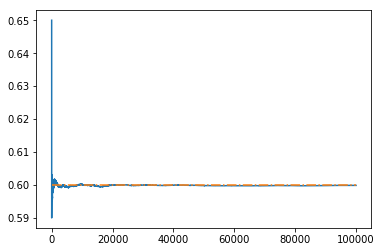

In [19]:
SS = 0
NN = 0
p = 0.6
V = np.zeros(N)
P = np.zeros(N)
for i in range(N):
    SS += S[i]
    NN += n
    V[i] = SS/NN*(1 - SS/NN)/(NN - 1)
    P[i] = SS/NN
plt.plot(P)
plt.plot([0, 100000],[p, p],'-.')

而方差刻画了此极限过程中，概率震荡的量化：

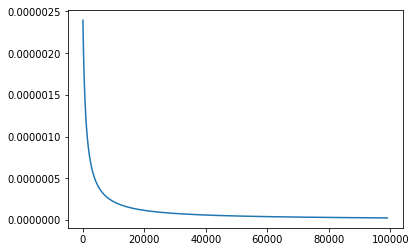

In [20]:
plt.plot(V[1000:])

从这个图像我们可以了解到，首先，概率收敛的速度是很慢的，对稍微大一点的$n$，震荡始终会保持和$0$水平渐近的方式。其次，即便对$Var[S/n]$的估计已经很小了，但是是否表示$|S/n-p|$也很小呢？，比如最后一项：

In [21]:
V[-1:]

array([2.40024968e-08])

而此时，

In [22]:
np.abs(SS/NN - p)

0.00012479999999992497

还是蛮大的，因为$Var[S]$是一个关于偏差平方的期望，而不是偏差绝对值。所以一般我们将$Var[S]$开个根号，$\sqrt{Var[S]}$作为$S$偏差的”标准误差“。

In [23]:
np.sqrt(V[-1:])

array([0.00015493])

看一下实际标准差变化和实际误差变化，这里实际误差取绝对误差：$|S/n - p|$。

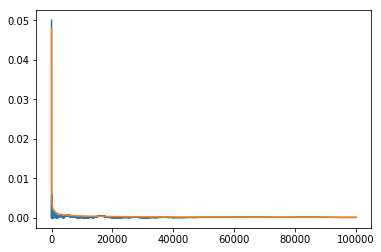

In [24]:
plt.plot(np.abs(P-p))
plt.plot(np.sqrt(V))

去掉开始不稳定的$1000$项：

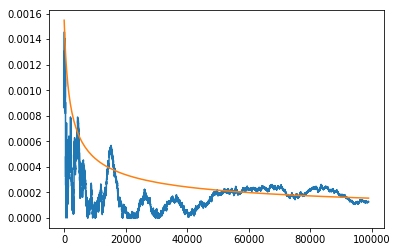

In [25]:
plt.plot(np.abs(P[1000:]-p))
plt.plot(np.sqrt(V[1000:]))

似乎还不错？但是！我们现在先把投币改成可以任意$0\sim 1$之间概率的，相应的多次投币也修改一下：

In [26]:
def magic_coin(p):
    Z = np.random.rand()
    X = 1
    if (Z < p):
        X = 0
    return X

def count_coin(n, p):
    S = 0
    X = np.zeros(n, dtype=np.int)
    for i in range(n):
        X[i] = magic_coin(p)
        S += X[i]
    return n - S

现在测试一下$p = 0.9$的情况，$n = 10000$一组，做$N = 1000$组，分别计算$S/n$和$\sqrt{V[S/n]}$：

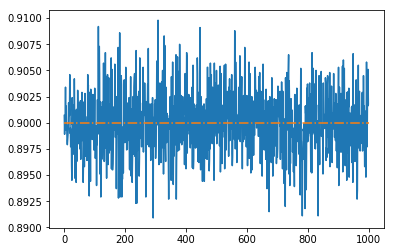

In [27]:
N = 1000
n = 10000
p = 0.9
S = np.zeros(N)
for i in range(N):
    S[i] = count_coin(n, p)
V = np.zeros(N)
P = np.zeros(N)
for i in range(N):
    V[i] = S[i]/n*(1 - S[i]/n)/(n - 1)
    P[i] = S[i]/n
plt.plot(P)
plt.plot([0, N],[p, p],'-.')    

再比较一下绝对误差和标准误差：

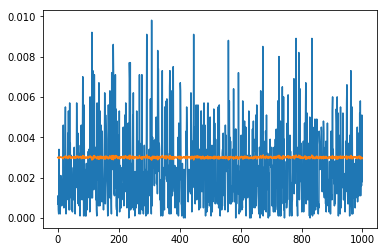

In [28]:
plt.plot(np.abs(P-p))
plt.plot(np.sqrt(V))

我们可以计算一下此时的绝对误差的均值和标准误差的均值：

In [29]:
print(np.abs(P-p).mean(),np.sqrt(V).mean())

0.002417099999999998 0.0030004475979523264


似乎也不错？现在对投币结果，人为加一个正向的扰动，注意，必须加正向的随机扰动，不能加一个常数。增加一个常数，不会改变方差。

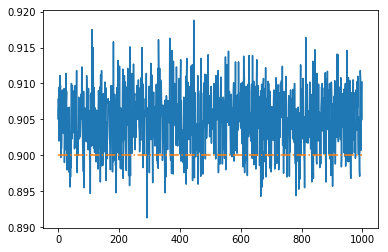

In [30]:
for i in range(N):
    S[i] += np.random.randint(100)
V = np.zeros(N)
P = np.zeros(N)
for i in range(N):
    V[i] = S[i]/n*(1 - S[i]/n)/(n - 1)
    P[i] = S[i]/n
plt.plot(P)
plt.plot([0, N],[p, p],'-.')    

肉眼可见的正向偏差，作为一个误差估计，这个时候应该报告误差更大才合理。然而此时计算标准误差，对比发现：

In [31]:
print(np.abs(P-p).mean(),np.sqrt(V).mean())

0.005382599999999981 0.0029333682697255236


反而下降了...这个原因我们在习题中已经了解，是因为当$p > 0.5$时，$S/n$和$V[S/n]$负相关的缘故。所以$S/n$越偏大，反而会带动作为误差评估的$V[S/n]$偏小。这个是不合理的。而且这件事情在$p < 0.5$时，正好反过来。

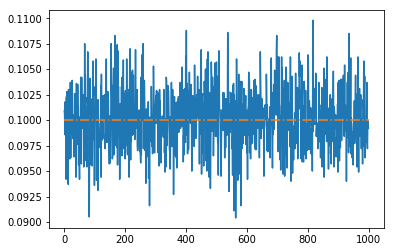

In [32]:
N = 1000
n = 10000
p = 0.1
S = np.zeros(N)
for i in range(N):
    S[i] = count_coin(n, p)
V = np.zeros(N)
P = np.zeros(N)
for i in range(N):
    V[i] = S[i]/n*(1 - S[i]/n)/(n - 1)
    P[i] = S[i]/n
plt.plot(P)
plt.plot([0, N],[p, p],'-.')    

In [33]:
print(np.abs(P-p).mean(),np.sqrt(V).mean())

0.0023656 0.003001179188345366


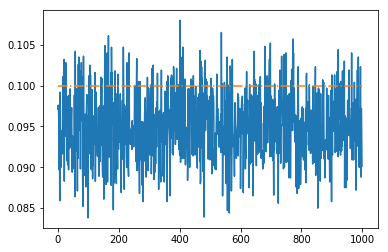

In [34]:
for i in range(N):
    S[i] -= np.random.randint(100)
V = np.zeros(N)
P = np.zeros(N)
for i in range(N):
    V[i] = S[i]/n*(1 - S[i]/n)/(n - 1)
    P[i] = S[i]/n
plt.plot(P)
plt.plot([0, N],[p, p],'-.')    

In [35]:
print(np.abs(P-p).mean(),np.sqrt(V).mean())

0.005412800000000004 0.0029325944360155723


所以现在的问题是，如何给一个”靠谱的“误差评估？因为”可计算的方差“，也就是标准误差，在这里有问题。当然这个问题不是特别严重，在粗略估计的场合还是可以使用的。那么现在先要回到基本的概率分布情况（先把工匠救醒，接下去都要靠他了...）：

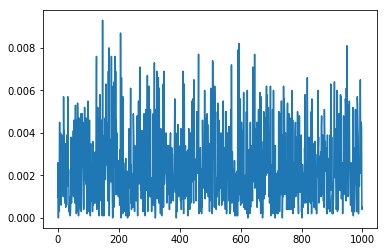

In [36]:
N = 1000
n = 10000
p = 0.1
S = np.zeros(N)
for i in range(N):
    S[i] = count_coin(n, p)
V = np.zeros(N)
P = np.zeros(N)
for i in range(N):
    V[i] = S[i]/n*(1 - S[i]/n)/(n - 1)
    P[i] = S[i]/n
plt.plot(np.abs(P - p))
#plt.plot([0, N],[p, p],'-.')    

<BarContainer object of 11 artists>

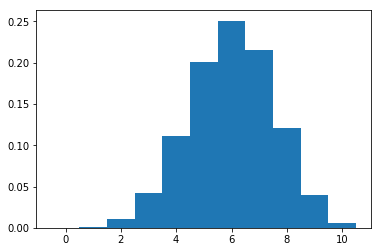

In [37]:
n = 10
p = 0.6
x = list(range(n + 1))
w = 1
f = np.zeros(n + 1)
for i in range(n + 1):
    f[i] = comb(n,i)*p**i*(1 - p)**(n - i)
plt.bar(x, f, width = w)

以上是$n = 10$的情况下，正面次数的分布。我们看看最大的$6$次占了百分之多少？即$P\{S = 6\}$：

In [38]:
f[6]

0.25082265600000003

哦，四分之一左右，如图：

<BarContainer object of 11 artists>

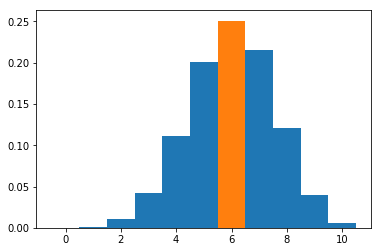

In [39]:
plt.bar(x, f, width = w)
for i in range(n + 1):
    if (i != 6):
        f[i] = 0
plt.bar(x, f, width = w)        

那么$6 \pm 1$呢？即$P\{5 \leq S \leq 7\}$：

<BarContainer object of 11 artists>

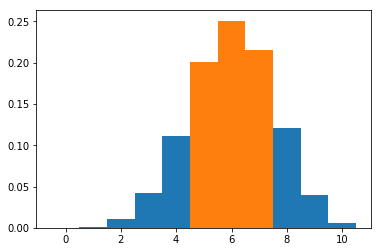

In [40]:
n = 10
p = 0.6
x = list(range(n + 1))
w = 1
f = np.zeros(n + 1)
for i in range(n + 1):
    f[i] = comb(n,i)*p**i*(1 - p)**(n - i)
plt.bar(x, f, width = w)
for i in range(n + 1):
    if (i < 5 or i > 7):
        f[i] = 0
plt.bar(x, f, width = w)        

具体的百分比是：

In [41]:
n = 10
p = 0.6
x = list(range(n + 1))
w = 1
f = np.zeros(n + 1)
for i in range(n + 1):
    f[i] = comb(n,i)*p**i*(1 - p)**(n - i)
f[5]+f[6]+f[7]

0.6664716288000001

哦，有百分之66.6了。那么$P\{|S - E[S]| \geq 1\}$，那么就是：

In [42]:
f[0]+f[1]+f[2]+f[3]+f[4]+f[8]+f[9]+f[10]

0.3335283712

所以上面的意思是，如果$n = 10$，那么我们有$\%66.7$的把握，让$S$和$E[S] = np$的绝对误差不超过$1$。这个数字不咋地，那么要提高把握，我们需要提升$n$。注意由于$n$增加，$S$也在增加，同时$S$的绝对误差也在增加，所以更合理的，是评估$S/n$和$E[S/n] = p$的绝对误差。当$n = 10$的时候，我们有$\%66.7$的把握，让$S/n$和$p$的绝对误差不超过$0.1$。这个就比较合理了。

<BarContainer object of 101 artists>

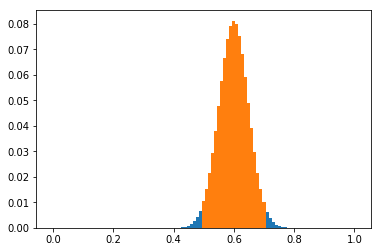

In [43]:
n = 100
p = 0.6
x = np.zeros(n + 1)
f = np.zeros(n + 1)
w = 1/(n)
for i in range(n + 1):
    x[i] = i * 1/n
    f[i] = comb(n,i)*p**i*(1 - p)**(n - i)
plt.bar(x, f, width = w)
for i in range(n + 1):
    if (i < 50 or i > 70):
        f[i] = 0
plt.bar(x, f, width = w)        

In [44]:
sum(f)

0.9684629952661072

当$n = 100$时，就有$\%96$的把握，让$|S/n-E[S/n]|$小于0.1了。

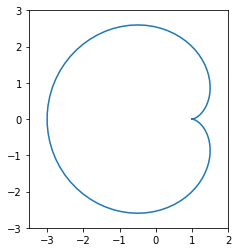

In [45]:
t = np.linspace(0, 2 * np.pi, 100)
x = 2 * np.cos(t) - np.cos(2 * t)
y = 2 * np.sin(t) - np.sin(2 * t)
plt.plot(x, y)
plt.xlim(-3.5, 2.0)
plt.ylim(-3, 3)
axs = plt.gca()
axs.set_aspect('equal', 'box')

In [ ]:
n = 1000
R0 = 0
R1 = 3
T0 = 0
T1 = 2.0 * np.pi
R = R0 + np.random.rand(n) * (R1 - R0)
T = T0 + np.random.rand(n) * (T1 - T0)
t = np.linspace(0, 2 * np.pi, 100)
x = 2 * np.cos(t) - np.cos(2 * t)
y = 2 * np.sin(t) - np.sin(2 * t)
plt.plot(x, y)
plt.plot(R * np.cos(T), R * np.sin(T), 'b.') 
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
axs = plt.gca()
axs.set_aspect('equal', 'box')

In [ ]:
plt.plot(T, R, '.')
plt.plot(t, np.sqrt((2 * np.cos(t) - np.cos(2 * t))**2 + (2 * np.sin(t) - np.sin(2 * t))**2))
plt.plot(t, np.sqrt((2 * np.cos(t))**2 + (2 * np.sin(t))**2), 'r--')